# Programming Language Trends

<a href="https://colab.research.google.com/github/PranayPrasanth/100DaysOfCode-DataScience-Projects/blob/master/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This notebook analyzes the trends in programming language popularity based on data from Stack Exchange. We will explore how the number of posts related to various programming languages has changed over time, providing insights into the evolving landscape of software development.

## Objectives

The main objectives of this notebook are:

- To load and clean the dataset containing information about programming language posts on Stack Exchange.
- To perform exploratory data analysis to understand the basic characteristics of the data.
- To visualize the trends in the number of posts for different programming languages over time using Matplotlib.
- To apply techniques like rolling averages to smooth out noisy time series data and identify underlying trends.
- To draw conclusions about the popularity of programming languages based on the analysis.

## Import Statements

In [1]:
# Import necessary libraries: pandas for data manipulation, numpy for numerical operations, and matplotlib for plotting.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

In [2]:
# Read the CSV file into a pandas DataFrame, specifying column names and skipping the header row.
cols = ['Date', 'Programming Language', 'Number of Posts']
df = pd.read_csv('QueryResults.csv', names=cols)[1:]

In [6]:
# Display the first 5 rows of the DataFrame.
print("First 5 Rows: ")
print(df.head(5))
# Check if there are any missing values in the DataFrame.
print(f"\nMissing Values: {df.isna().values.any()}")
# Check if there are any duplicate rows in the DataFrame.
print(f"Duplicated Rows: {df.duplicated().values.any()}")

First 5 Rows: 
                  Date Programming Language  Number of Posts
1  2008-07-01 00:00:00                   c#              3.0
2  2008-08-01 00:00:00             assembly              8.0
3  2008-08-01 00:00:00           javascript            162.0
4  2008-08-01 00:00:00                    c             85.0
5  2008-08-01 00:00:00               python            124.0

Missing Values: False
Duplicated Rows: False


In [ ]:
# Print the dimensions (number of rows and columns) of the DataFrame.
df.shape

(1991, 3)

In [11]:
# Calculate the number of non-null entries in each column.
count = [df[column].count() for column in df.columns]
# Print the counts for each column.
print(count)

[np.int64(1991), np.int64(1991), np.int64(1991)]


In [ ]:
# Group the DataFrame by 'Programming Language' and calculate the sum of 'Number of Posts' for each language.
df_posts_by_language = df.groupby('Programming Language').sum()
# Sort the results in descending order based on the total number of posts.
df_posts_by_language.sort_values('Number of Posts', ascending=False)

,Date,Number of Posts
Programming Language,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510.0
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403.0
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1496210.0
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530.0
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1361988.0
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210.0
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,356799.0
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042.0
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,273055.0


In [ ]:
# Print the data type of the 'Date' column (before conversion).
print(type(df['Date'][1]))

# Group the DataFrame by 'Programming Language' and count the number of entries for each language.
df.groupby("Programming Language").count()

<class 'str'>


,Date,Number of Posts
Programming Language,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [ ]:
# Convert the 'Date' column to datetime objects.
df['Date'] = pd.to_datetime(df.Date)

## Data Manipulation



In [13]:
# Pivot the DataFrame to have 'Date' as the index, 'Programming Language' as columns, and 'Number of Posts' as values.
reshaped_df = df.pivot(index='Date', columns='Programming Language', values='Number of Posts')
# Display the reshaped DataFrame.
reshaped_df

Programming Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01 00:00:00,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01 00:00:00,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01 00:00:00,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01 00:00:00,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01 00:00:00,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01 00:00:00,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01 00:00:00,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01 00:00:00,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [ ]:
# Print the dimensions (number of rows and columns) of the reshaped DataFrame.
reshaped_df.shape

(145, 14)

In [ ]:
# Fill any missing values (NaN) in the reshaped DataFrame with 0.
reshaped_df.fillna(0,inplace=True)

In [ ]:
# Display the reshaped DataFrame after filling missing values.
reshaped_df

Programming Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


## Data Visualisaton with with Matplotlib


/tmp/ipython-input-3052890719.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


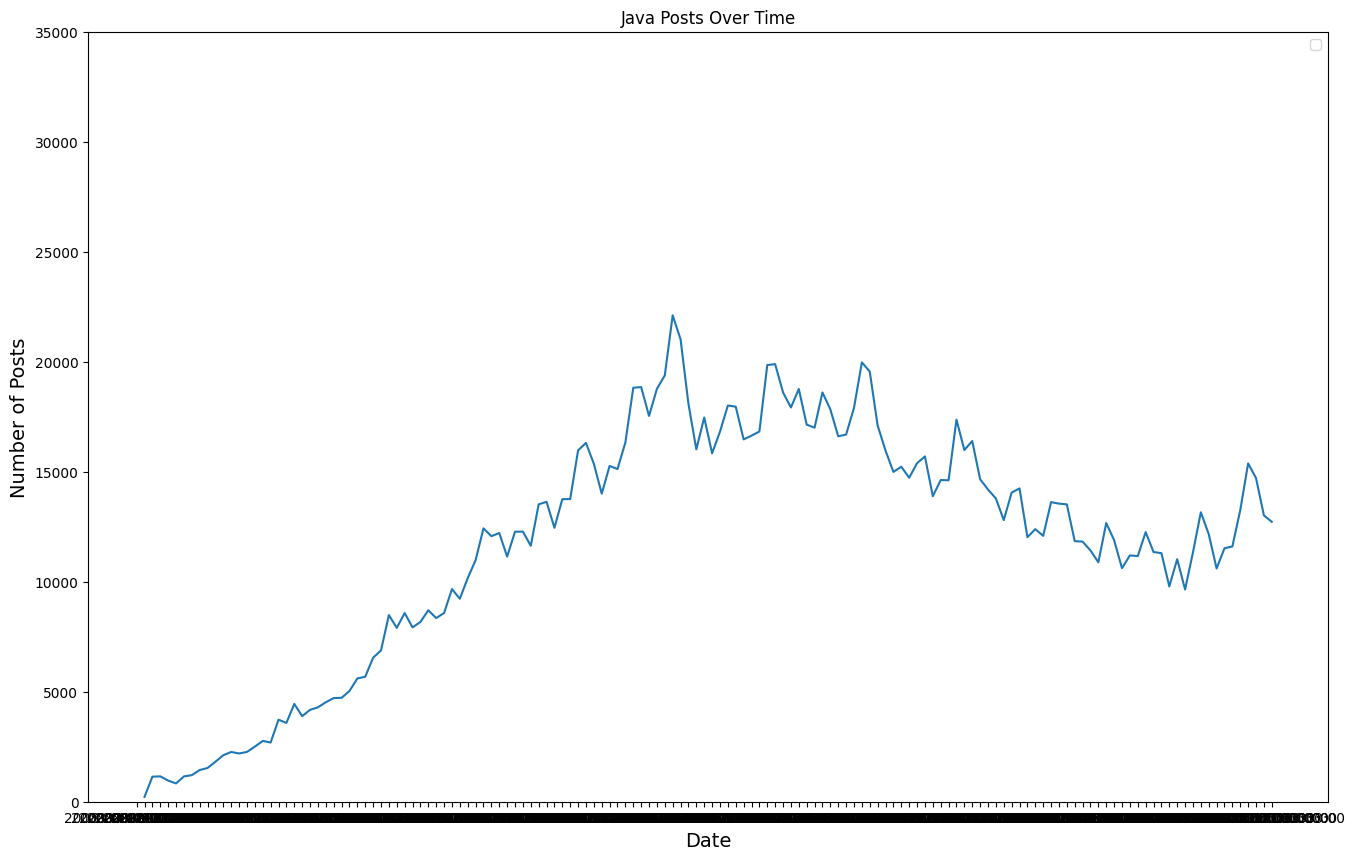

In [16]:
# Create a new figure for the plot with a specified size.
plt.figure(figsize=(16,10))
# Add a legend to the plot (will be empty if no labels are provided in plot calls).
plt.legend()

# Set the label for the x-axis.
plt.xlabel('Date', fontsize=14)
# Set the label for the y-axis.
plt.ylabel('Number of Posts', fontsize=14)
# Set the limits for the y-axis.
plt.ylim(0, 35000)

# Set the title of the plot.
plt.title('Java Posts Over Time')

# Plot the 'java' column against the DataFrame index (Date).
plt.plot(reshaped_df.index, reshaped_df.java)


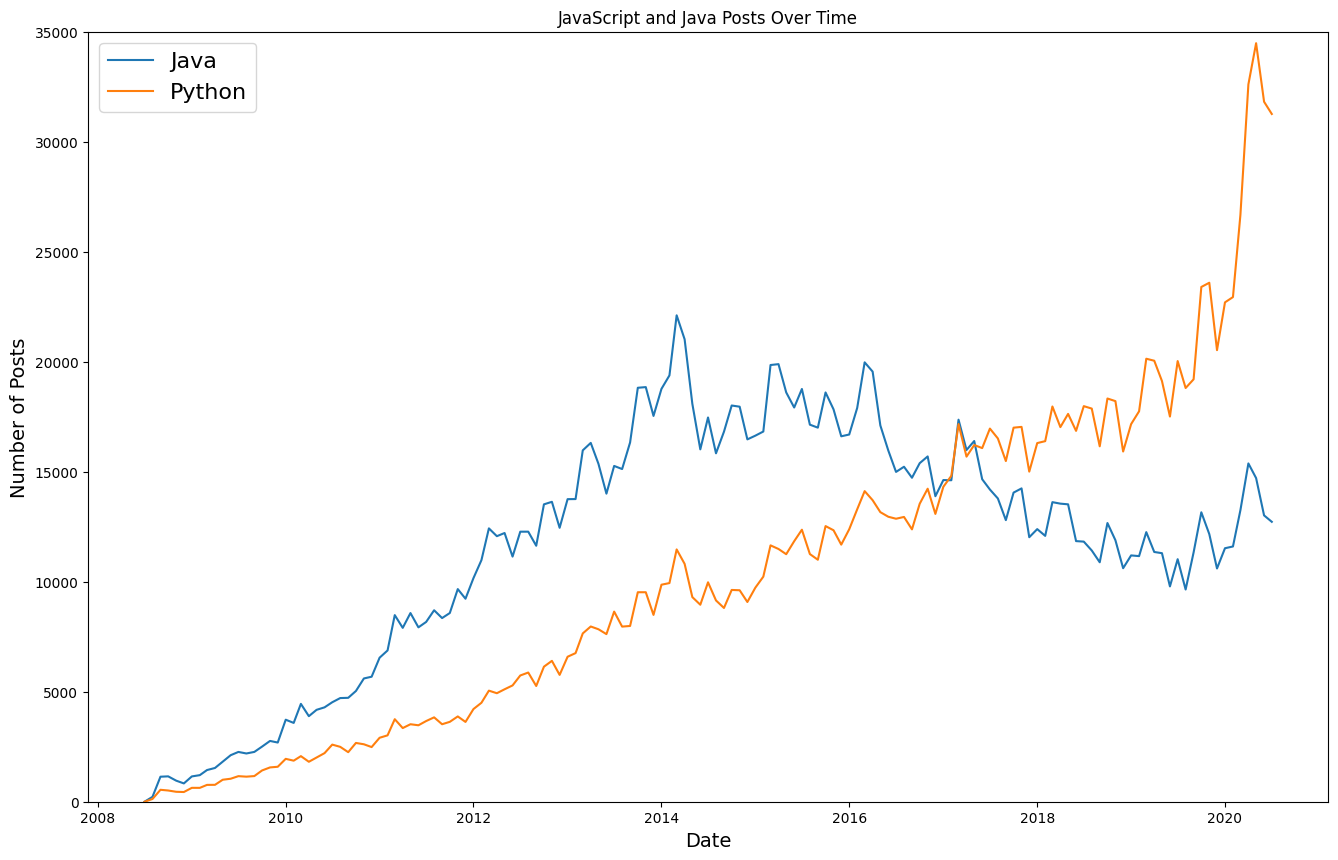

In [ ]:
# Create a new figure for the plot with a specified size.
plt.figure(figsize=(16,10))


# Set the label for the x-axis.
plt.xlabel('Date', fontsize=14)
# Set the label for the y-axis.
plt.ylabel('Number of Posts', fontsize=14)
# Set the limits for the y-axis.
plt.ylim(0, 35000)

# Set the title of the plot.
plt.title('JavaScript and Java Posts Over Time')

# Plot the 'java' column against the DataFrame index (Date) with a label for the legend.
plt.plot(reshaped_df.index, reshaped_df.java, label='Java')
# Plot the 'python' column against the DataFrame index (Date) with a label for the legend.
plt.plot(reshaped_df.index, reshaped_df.python, label='Python')
# Add a legend to the plot with a specified font size.
plt.legend(fontsize=16)

## Visualise Trends

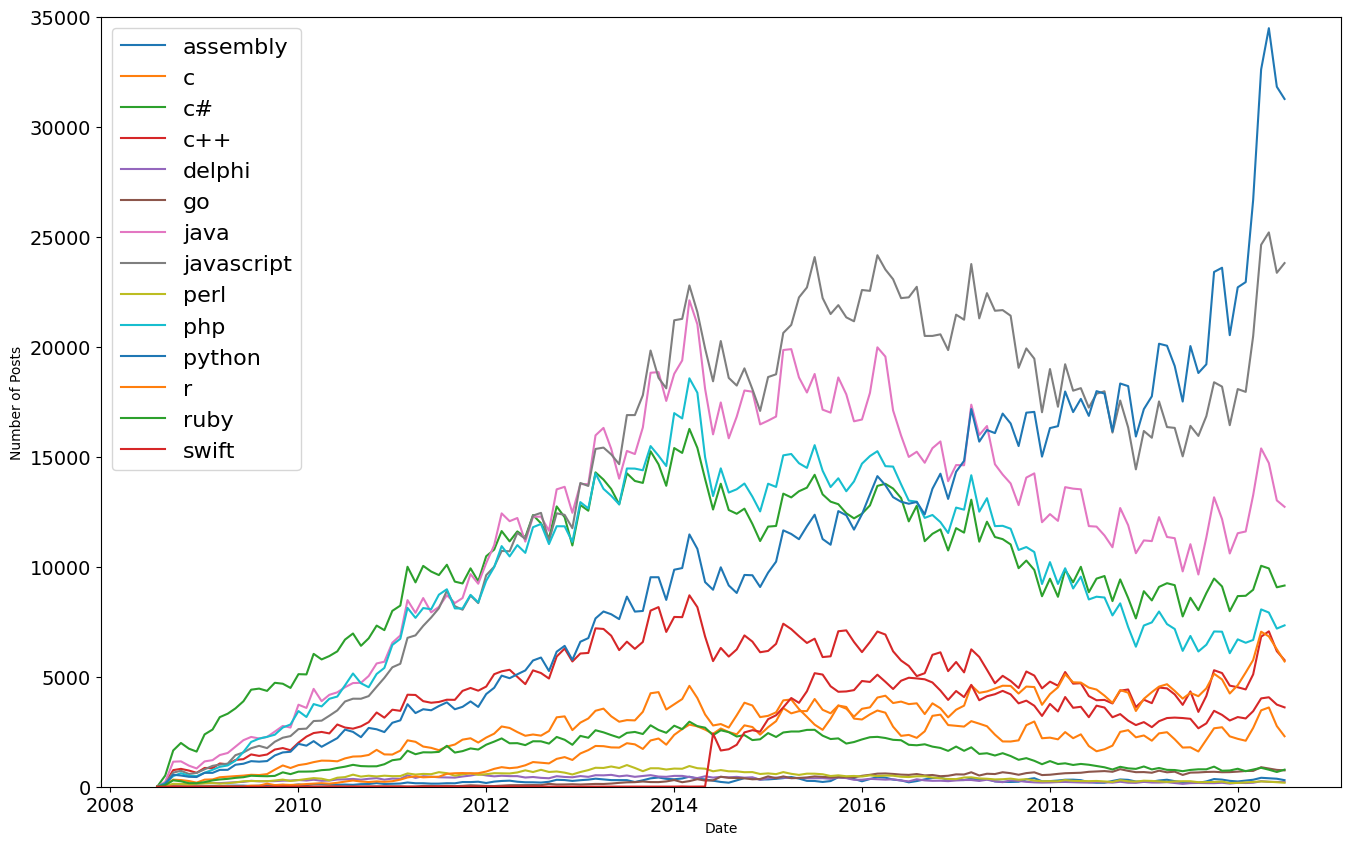

In [ ]:
# Create a new figure for the plot with a specified size.
plt.figure(figsize=(16,10))
# Set the font size for the x-axis ticks.
plt.xticks(fontsize=14)
# Set the font size for the y-axis ticks.
plt.yticks(fontsize=14)
# Set the label for the x-axis.
plt.xlabel('Date')
# Set the label for the y-axis.
plt.ylabel('Number of Posts')
# Set the limits for the y-axis.
plt.ylim(0,35000)


# Iterate through each column (programming language) in the reshaped DataFrame.
for column in reshaped_df.columns:
  # Plot each column against the DataFrame index (Date) with the column name as the label for the legend.
  plt.plot(reshaped_df.index, reshaped_df[column], label=column)
# Add a legend to the plot with a specified font size.
plt.legend(fontsize=16)

## Smoothing out the Graph

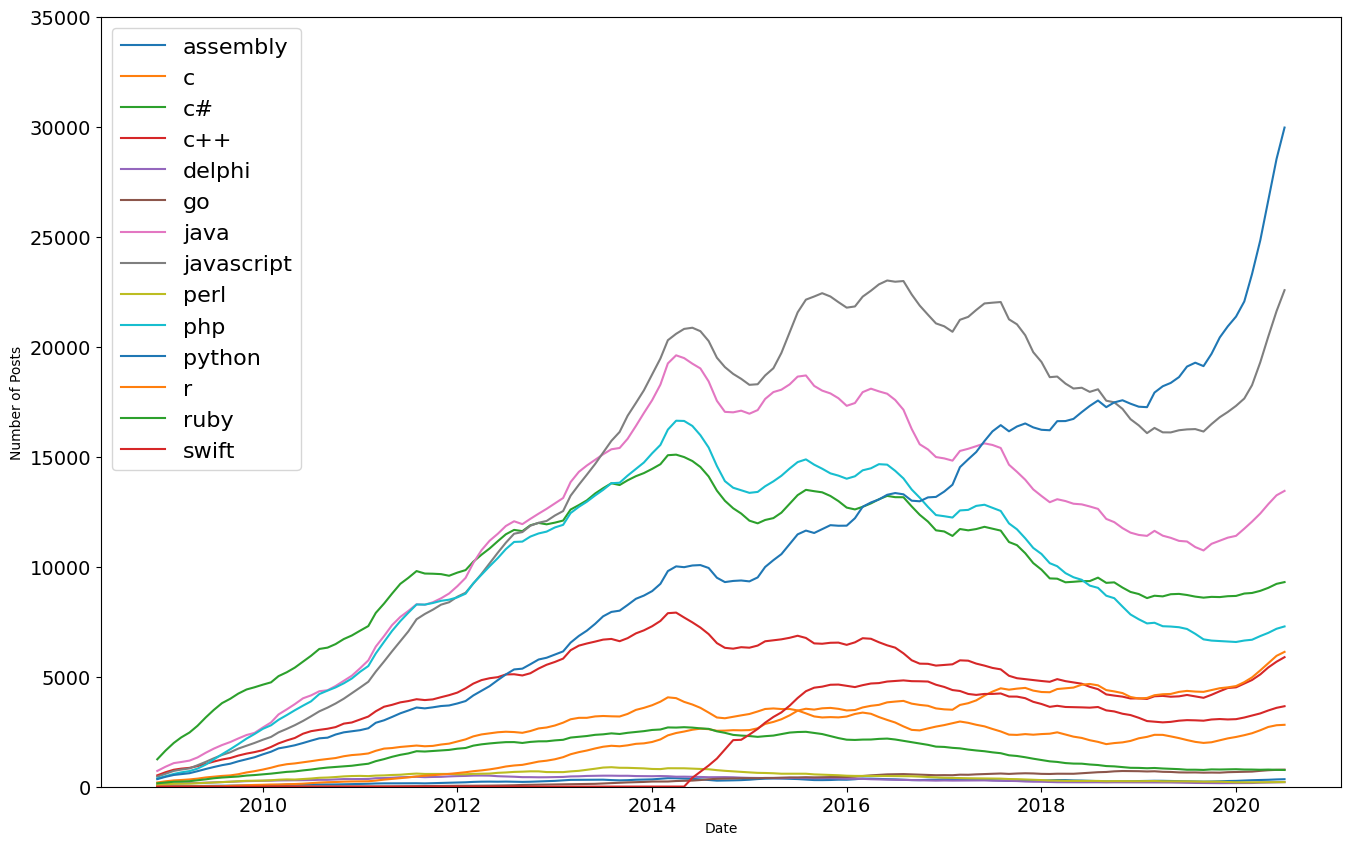

In [ ]:
# Calculate the rolling mean with a window of 6 for each column in the reshaped DataFrame.
roll_df = reshaped_df.rolling(window=6).mean()

# Create a new figure for the plot with a specified size.
plt.figure(figsize=(16,10))
# Set the font size for the x-axis ticks.
plt.xticks(fontsize=14)
# Set the font size for the y-axis ticks.
plt.yticks(fontsize=14)
# Set the label for the x-axis.
plt.xlabel('Date')
# Set the label for the y-axis.
plt.ylabel('Number of Posts')
# Set the limits for the y-axis.
plt.ylim(0,35000)

# Iterate through each column (programming language) in the reshaped DataFrame.
for column in reshaped_df.columns:
  # Plot the rolling mean of each column against the DataFrame index (Date) with the column name as the label for the legend.
  plt.plot(roll_df.index, roll_df[column], label=column)
# Add a legend to the plot with a specified font size.
plt.legend(fontsize=16)

## Conclusion

In this notebook, we explored the popularity of various programming languages over time using data from Stack Overflow. We began by importing and cleaning the data, then performed some basic exploratory data analysis to understand the overall trends.

We then used Matplotlib to visualize the popularity of individual languages and to compare the popularity of different languages. Our visualizations highlighted the growth of languages like Python and JavaScript, as well as the relative decline of languages like Java and C++. We also learned how to apply rolling averages to time series data to smooth out short-term fluctuations.

By analyzing the data, we were able to identify some key takeaways:

Python's popularity has surged in recent years, possibly due to its applications in fields like data science and machine learning.
JavaScript remains a dominant language, particularly in web development.
While some languages, like Java and C++, are less popular than in the past, they still have a significant user base.
Further analysis could involve exploring the reasons behind these trends, or investigating the popularity of other programming languages. Additionally, we could use more advanced statistical techniques to identify any seasonality or other patterns in the data.

Overall, this analysis provides a valuable snapshot of the evolving landscape of programming languages.

Potential next steps:

Investigate the popularity of languages not included in this analysis.
Explore factors influencing language popularity such as industry trends or specific use cases.
Apply more advanced time series analysis methods for deeper insights.
Build interactive visualizations for user exploration of data.